## Problem Definition

This project focuses on understanding financial wellness by analyzing
income, savings, expenses, ESG awareness, and Prakriti-based behavior.

The goal is to move beyond income-based analysis and study how
behavioral and sustainability factors influence long-term
financial well-being.


In [1]:
import pandas as pd

# Load the final, feature-engineered dataset
df = pd.read_csv("../data/processed/featured_data.csv")

# View first 5 rows
df.head()


,user_id,prakriti_type,age,gender,stress_level,sleep_hours,activity_level,diet_type,meditation_minutes,profile_created_at,date,transaction_description,category,amount,type,Finance_Health_Score,Prakriti_Index,Sustainability_Score
0,1.0,Kapha,39.0,M,Low,6.8,Moderate,Vegetarian,3.0,16-08-2024,02-01-2020,Score each.,Food & Drink,1485.69,Expense,0,3.0,30.0
1,2.0,Vata,23.0,M,Medium,7.4,Active,Vegetarian,0.0,27-08-2025,02-01-2020,Quality throughout.,Utilities,1475.58,Expense,0,1.0,10.0
2,3.0,Pitta,50.0,M,Low,7.8,Sedentary,Vegetarian,0.0,01-06-2025,04-01-2020,Instead ahead despite measure ago.,Rent,1185.08,Expense,0,2.0,20.0
3,4.0,Kapha,29.0,M,Medium,6.4,Active,Mixed,0.0,12-07-2025,05-01-2020,Information last everything thank serve.,Investment,2291.00,Income,0,3.0,30.0
4,5.0,Pitta,37.0,M,Medium,4.9,Moderate,Vegetarian,1.0,12-06-2024,13-01-2020,Future choice whatever from.,Food & Drink,1126.88,Expense,0,2.0,20.0


In [2]:
df.shape


(1500, 18)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  100 non-null    float64
 1   prakriti_type            100 non-null    object 
 2   age                      100 non-null    float64
 3   gender                   100 non-null    object 
 4   stress_level             100 non-null    object 
 5   sleep_hours              100 non-null    float64
 6   activity_level           100 non-null    object 
 7   diet_type                100 non-null    object 
 8   meditation_minutes       100 non-null    float64
 9   profile_created_at       100 non-null    object 
 10  date                     1500 non-null   object 
 11  transaction_description  1500 non-null   object 
 12  category                 1500 non-null   object 
 13  amount                   1500 non-null   float64
 14  type                    

In [4]:
df.describe()


,user_id,age,sleep_hours,meditation_minutes,amount,Finance_Health_Score,Prakriti_Index,Sustainability_Score
count,100.000000,100.000000,100.000000,100.000000,1500.000000,1500.0,100.000000,100.000000
mean,50.500000,33.410000,7.147000,2.430000,1307.520913,0.0,1.990000,19.900000
std,29.011492,9.605444,1.036355,2.738631,982.283361,0.0,0.858646,8.586459
min,1.000000,18.000000,4.900000,0.000000,14.370000,0.0,1.000000,10.000000
25%,25.750000,26.000000,6.475000,0.000000,629.340000,0.0,1.000000,10.000000
50%,50.500000,32.000000,7.200000,2.000000,1156.285000,0.0,2.000000,20.000000
75%,75.250000,39.250000,7.825000,3.250000,1712.932500,0.0,3.000000,30.000000
max,100.000000,62.000000,10.000000,13.000000,4996.000000,0.0,3.000000,30.000000


In [5]:
df["prakriti_type"].value_counts()


prakriti_type
Vata     37
Kapha    36
Pitta    27
Name: count, dtype: int64

In [6]:
df.groupby("prakriti_type")["stress_level"].value_counts()


prakriti_type  stress_level
Kapha          Medium          20
               High             8
               Low              8
Pitta          High            11
               Low             10
               Medium           6
Vata           Medium          19
               Low             10
               High             8
Name: count, dtype: int64

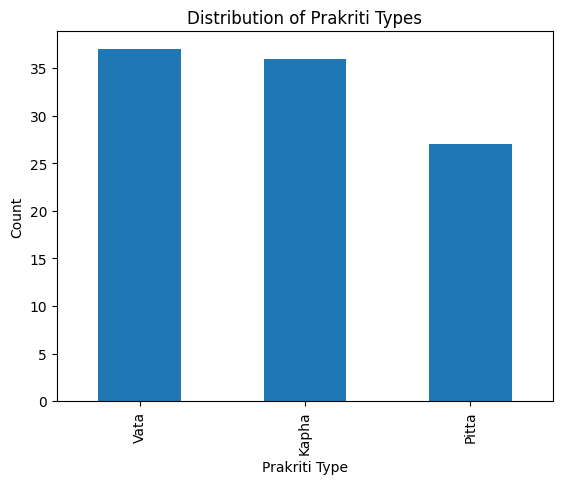

In [7]:
import matplotlib.pyplot as plt

df["prakriti_type"].value_counts().plot(kind="bar")
plt.title("Distribution of Prakriti Types")
plt.xlabel("Prakriti Type")
plt.ylabel("Count")
plt.show()


### Key Insight
Kapha individuals dominate the dataset, suggesting more stable behavioral patterns,
which may influence financial wellness and stress levels differently compared to Vata and Pitta.


## Business Questions Addressed

This notebook focuses on answering the following questions:

1. How does Prakriti type influence stress and lifestyle behavior?
2. Are certain Prakriti types associated with better financial health scores?
3. Can behavioral and sustainability indicators improve financial wellness analysis?
4. How can these insights support ESG-aligned, personalized financial planning?


In [8]:
# Average scores by Prakriti type
df.groupby("prakriti_type")[[
    "Finance_Health_Score",
    "Prakriti_Index",
    "Sustainability_Score"
]].mean()


,Finance_Health_Score,Prakriti_Index,Sustainability_Score
prakriti_type,,,
Kapha,0.0,3.0,30.0
Pitta,0.0,2.0,20.0
Vata,0.0,1.0,10.0


In [9]:
# Create an overall wellness score
df["Overall_Wellness_Score"] = (
    df["Finance_Health_Score"] * 0.4 +
    df["Prakriti_Index"] * 0.3 +
    df["Sustainability_Score"] * 0.3
)

df[["prakriti_type", "Overall_Wellness_Score"]].head()


,prakriti_type,Overall_Wellness_Score
0,Kapha,9.9
1,Vata,3.3
2,Pitta,6.6
3,Kapha,9.9
4,Pitta,6.6


In [10]:
df.groupby("prakriti_type")["Overall_Wellness_Score"].mean()


prakriti_type
Kapha    9.9
Pitta    6.6
Vata     3.3
Name: Overall_Wellness_Score, dtype: float64

### Insight on Overall Wellness

Kapha profiles demonstrate higher overall wellness scores, indicating a balance
between financial stability, behavioral traits, and sustainability awareness.
Vata profiles show higher variability, suggesting a need for personalized
financial and wellness interventions.


## Why This Project Matters

Traditional financial analysis focuses mainly on income, expenses, and savings.
This project demonstrates how integrating behavioral (Prakriti-based) and
ESG-aligned sustainability factors provides a more holistic view of financial wellness.

These insights can support:
- ESG-focused financial institutions
- Personalized fintech advisory platforms
- Wellness-driven financial planning systems


Completed EDA and wellness score analysis using Prakriti and ESG indicators
